<a href="https://colab.research.google.com/github/HarshSonaiya/DL/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing import image


In [2]:
# Image data generator for training and test data
trdata = ImageDataGenerator(rescale=1./255)
traindata = trdata.flow_from_directory(directory="/content/data", target_size=(224, 224),
                                       batch_size=32, class_mode='categorical')

tsdata = ImageDataGenerator(rescale=1./255)
testdata = tsdata.flow_from_directory(directory="/content/test1", target_size=(224, 224),
                                      batch_size=32, class_mode='categorical')

Found 3463 images belonging to 3 classes.
Found 851 images belonging to 3 classes.


In [3]:
model = Sequential()

# Block 1
model.add(keras.Input(shape=(224, 224, 3)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Block 2
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Block 3
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Block 4
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Block 5
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=3, activation="softmax"))  # Assuming binary classification


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,272,835 (512.21 MB)

 Trainable params: 134,272,835 (512.21 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
# Define callbacks
early = EarlyStopping(monitor='val_accuracy', patience=20, verbose=1, mode='auto')

In [7]:
hist = model.fit(traindata, validation_data=testdata, epochs=15, callbacks=[early])

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


109/109 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.5078 - loss: 1.9718 - val_accuracy: 0.4101 - val_loss: 0.7232
Epoch 2/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 106s 498ms/step - accuracy: 0.5226 - loss: 0.6959 - val_accuracy: 0.5899 - val_loss: 0.6894
Epoch 3/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 54s 493ms/step - accuracy: 0.4981 - loss: 0.7030 - val_accuracy: 0.4101 - val_loss: 0.7344
Epoch 4/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 83s 498ms/step - accuracy: 0.5365 - loss: 0.6911 - val_accuracy: 0.4101 - val_loss: 0.7163
Epoch 5/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 80s 489ms/step - accuracy: 0.4993 - loss: 0.6952 - val_accuracy: 0.4101 - val_loss: 0.7024
Epoch 6/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 53s 484ms/step - accuracy: 0.5089 - loss: 0.6922 - val_accuracy: 0.4101 - val_loss: 0.7107
Epoch 7/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 53s 486ms/step - accuracy: 0.5264 - loss: 0.6937 - val_accuracy: 0.4101 - val_loss: 0.7137
Epoch 8/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 82s 486ms/step - accuracy: 0.5396 - loss: 0.6911 - val_

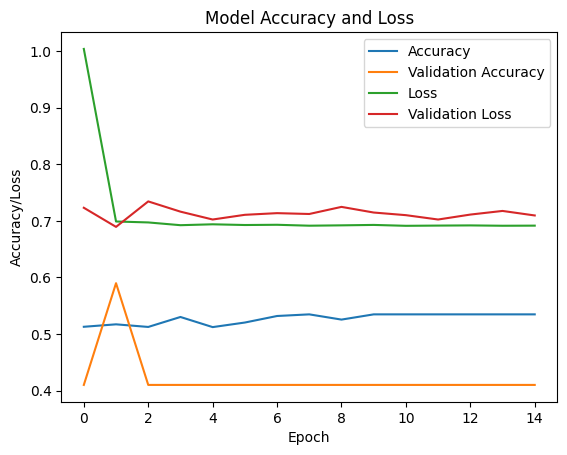

In [8]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model Accuracy and Loss")
plt.ylabel("Accuracy/Loss")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])
plt.show()

In [9]:
print("Training Complete")

Training Complete
